Registration started
Global and Local Registration
:: Load two point clouds with initial pose.
:: Downsample with a voxel size 0.100.
:: Estimate normal with search radius 0.200.
:: Compute FPFH feature with search radius 0.300.
:: Downsample with a voxel size 0.100.
:: Estimate normal with search radius 0.200.
:: Compute FPFH feature with search radius 0.300.
:: Apply global registration with distance threshold 0.850
Iteration Index: 0, Scale Index: 0, Scale Iteration Index: 0, Fitness: 1.0, Inlier RMSE: 0.20477217738696005,
Iteration Index: 1, Scale Index: 0, Scale Iteration Index: 1, Fitness: 1.0, Inlier RMSE: 0.1843972855669464,
Iteration Index: 2, Scale Index: 0, Scale Iteration Index: 2, Fitness: 1.0, Inlier RMSE: 0.17439677795790778,
Iteration Index: 3, Scale Index: 0, Scale Iteration Index: 3, Fitness: 1.0, Inlier RMSE: 0.16897131973732216,
Iteration Index: 4, Scale Index: 0, Scale Iteration Index: 4, Fitness: 1.0, Inlier RMSE: 0.16561814391310448,
Iteration Index: 5, Scale Ind

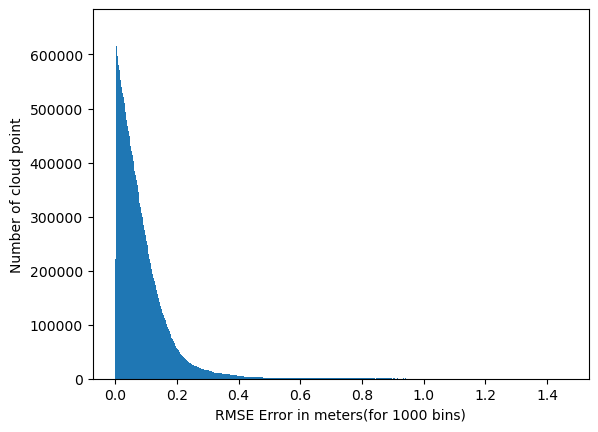

Histogram Log Scale


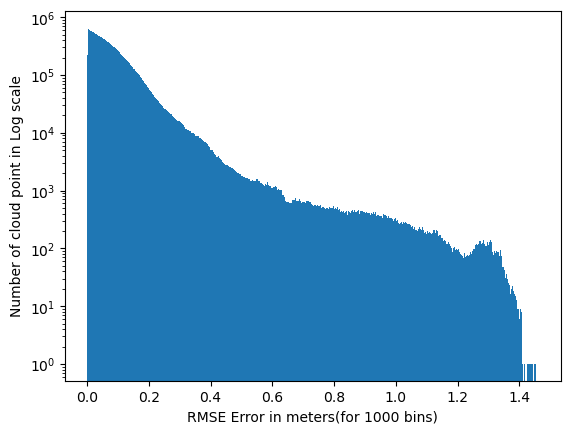

Final Transformation Matrix [[ 0.92244583 -0.03254099  0.02735537  4.08663187]
 [ 0.03353823  0.92219168 -0.03392979  1.98665951]
 [-0.02612317  0.03488735  0.92239579  0.32039801]
 [ 0.          0.          0.          1.        ]]
Global and Local Registration
:: Load two point clouds with initial pose.
:: Downsample with a voxel size 0.100.
:: Estimate normal with search radius 0.200.
:: Compute FPFH feature with search radius 0.300.
:: Downsample with a voxel size 0.100.
:: Estimate normal with search radius 0.200.
:: Compute FPFH feature with search radius 0.300.
:: Apply global registration with distance threshold 0.850
Iteration Index: 0, Scale Index: 0, Scale Iteration Index: 0, Fitness: 1.0, Inlier RMSE: 0.11999036364566729,
Iteration Index: 1, Scale Index: 0, Scale Iteration Index: 1, Fitness: 1.0, Inlier RMSE: 0.11782946132142083,
Iteration Index: 2, Scale Index: 0, Scale Iteration Index: 2, Fitness: 1.0, Inlier RMSE: 0.11638666923339838,
Iteration Index: 3, Scale Index: 0, 

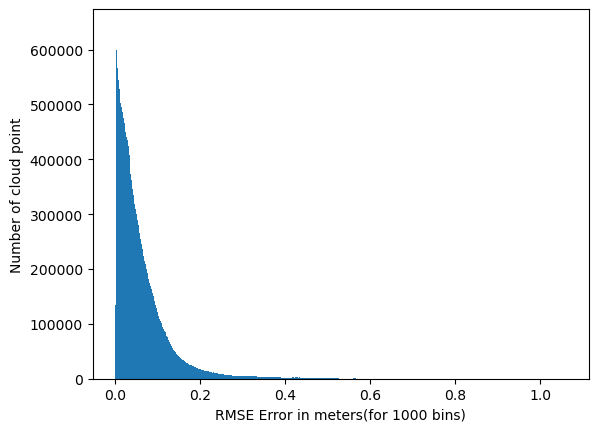

Histogram Log Scale


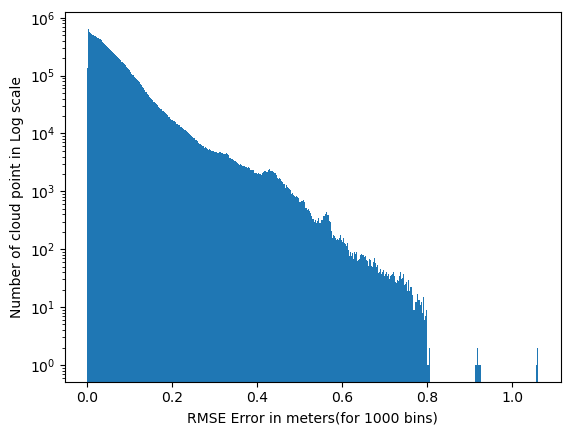

Final Transformation Matrix [[ 0.98592285 -0.04438337  0.0413935  -2.13343422]
 [ 0.04502492  0.98665588 -0.0144946  -4.85625276]
 [-0.04069474  0.016354    0.9868149   2.68121504]
 [ 0.          0.          0.          1.        ]]
Registration DONE
CAMERA DATA Preproccesing Done


In [61]:
import numpy as np
import vis_camera
import camera
import numpy as np
import os
import shutil
import preprocess_dataset
transformed_camera_sets = preprocess_dataset.camera_transformation()

In [62]:
camera_14, camera_15, camera_16 = transformed_camera_sets
camera_14 = np.asarray(camera_14, dtype="object")
camera_15 = np.asarray(camera_15, dtype="object")
camera_16 = np.asarray(camera_16, dtype="object")

In [63]:
positive_sample = []
for idx in range(len(camera_14)):
    for idy in range(len(camera_15)):
        x_diff = camera_14[idx][1][0, 3]-camera_15[idy][1][0, 3]
        y_diff = camera_14[idx][1][1, 3]-camera_15[idy][1][1, 3]
        z_diff = camera_14[idx][1][2, 3]-camera_15[idy][1][2, 3]
        ratio = 0 #(z_diff*.10)/.53
        if abs(x_diff)<(0.13+ratio) and abs(y_diff)<(0.13+ratio):
            positive_sample.append([camera_14[idx], camera_15[idy]])
# len(positive_sample)

In [75]:
def depth_min_max(cam14, cam):
    z = []
    for idx in range(len(cam14)):
        for idy in range(len(cam)):
            z_diff = cam14[idx][1][2, 3]-cam[idy][1][2, 3]
            z.append(z_diff)
    return min(z), max(z)

def create_positive_sample(cam14, cam, max_depth):
    max_depth = max_depth + 0.5
    positive_sample = []
    z = []
    ratio_all = []
    for idx in range(len(cam14)):
        for idy in range(len(cam)):
            x_diff = cam14[idx][1][0, 3]-cam[idy][1][0, 3]
            y_diff = cam14[idx][1][1, 3]-cam[idy][1][1, 3]
            z_diff = cam14[idx][1][2, 3]-cam[idy][1][2, 3]
            if z_diff<0:
                ratio = -(.10*(max_depth-z_diff)/max_depth)
            else:
                ratio = (.10*(max_depth-z_diff)/max_depth)
            ratio = 0
            if abs(x_diff)<(0.15 - ratio) and abs(y_diff)<(0.15 - ratio):
                z.append(z_diff)
                ratio_all.append(ratio)
                positive_sample.append([camera_14[idx], cam[idy]])
    return  positive_sample, z, ratio_all
min_z_train, max_z_train = depth_min_max(camera_14, camera_15)
positive_sample_train, z_diff_train, ratio_all_train = create_positive_sample(camera_14, camera_15, max_z_train)
min_z_test, max_z_test = depth_min_max(camera_14, camera_16)
positive_sample_test, z_diff_test, ratio_all_test = create_positive_sample(camera_14, camera_16, max_z_test)

In [76]:
len(positive_sample_train), len(positive_sample_test)#, min(z_diff), max(z_diff),min(ratio_all), max(ratio_all)
#min_z_test, max_z_test,min_z_train, max_z_train

(1183, 1596)

In [78]:

def save_image_pair(positive_sample_train, positive_sample_test):
    path_14 = "/home/turin/Desktop/lizard_island/jackson/chronological/2014/r20141102_074952_lizard_d2_081_horseshoe_circle01/081_photos/"
    path_15 = "/home/turin/Desktop/lizard_island/jackson/chronological/2015/r20151207_222558_lizard_d2_039_horseshoe_circle01/039_photos/"
    path_16 = "/home/turin/Desktop/lizard_island/jackson/chronological/2016/r20161121_063027_lizard_d2_050_horseshoe_circle01/050_photos/"
    if not os.path.exists(os.getcwd() + "/positive_pair_train"):
        os.mkdir(os.getcwd()+"/positive_pair_train")
    for idx in positive_sample_train:
        dst = os.getcwd()+"/positive_pair_train/"+idx[0][0][:-4]
        if not os.path.exists(dst):
            os.mkdir(dst)
            shutil.copy(path_14+idx[0][0], dst)
        src = path_15+idx[1][0]
        shutil.copy(src, dst)
    if not os.path.exists(os.getcwd() + "/positive_pair_test"):
        os.mkdir(os.getcwd()+"/positive_pair_test")
    for idx in positive_sample_test:
        dst = os.getcwd()+"/positive_pair_test/"+idx[0][0][:-4]
        if not os.path.exists(dst):
            os.mkdir(dst)
            shutil.copy(path_14+idx[0][0], dst)
        src = path_16+idx[1][0]
        shutil.copy(src, dst)

save_image_pair(positive_sample_train, positive_sample_test)

In [34]:
import Metashape
doc = Metashape.Document()
project_path = "/home/turin/Desktop/lizard_jackson/chronological/2014/r20141102_074952_lizard_d2_081_horseshoe_circle01/r20141102_074952_lizard_d2_081_horseshoe_circle01.psx"
doc.open(project_path)
chunk = doc.chunk
cameras = chunk.cameras

LoadProject: path = /home/turin/Desktop/lizard_jackson/chronological/2014/r20141102_074952_lizard_d2_081_horseshoe_circle01/r20141102_074952_lizard_d2_081_horseshoe_circle01.psx
loaded project in 0.000753 sec


Document.open(): The document is opened in read-only mode because it is already in use.


In [246]:
#Get all tie points
point_cloud = chunk.tie_points
#Get camera projections of the tie points
projections = point_cloud.projections
#Get the points
points = point_cloud.points
#Sift descriptors
desc_points = {}
#Iterate over all camera
for camera in cameras:
    desc_2D3D = {}
    sift_points = []
    #3D point per 2D sift points
    pcd_3d_points = []
    for proj in projections[camera]:
        #Append all 2D
        sift_points.append(proj.coord)
        #Append all 3D
        pcd_3d_points.append(camera.unproject(proj.coord))
    desc_2D3D["2D"] = sift_points
    desc_2D3D["3D"] = pcd_3d_points
    desc_points[camera.label]=desc_2D3D

In [252]:
desc1 = desc_points[cameras[0].label]
desc10 = desc_points[cameras[9].label]
desc1["3D"][0], desc10["3D"][0]

(Vector([39.37852949562847, 74.27496791942818, 5.811797388756464]),
 Vector([30.107019527991234, 68.43912262680055, 12.748295145067765]))